# Data Exploration
This notebook contains initial data exploration and dataset exploration.

## Initial Data Exploration

In [1]:
from config import *
from LoadDataset import CustomImageDataset

In [2]:
import os

def list_directory_contents(path: str):
    """
    Lists the files and folders in the given directory.

    Args:
    - path (str): The path to the directory.

    Returns:
    - dict: A dictionary with keys 'files' and 'folders' containing lists of files and folders respectively.
    """
    contents = {'files': [], 'folders': []}
    
    # Ensure the path is a directory
    if not os.path.isdir(path):
        raise NotADirectoryError(f"The path '{path}' is not a directory or does not exist.")
    
    # List the contents of the directory
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isfile(item_path):
            contents['files'].append(item)
        elif os.path.isdir(item_path):
            contents['folders'].append(item)
    
    return contents

images/3/55/3431791003,2787357355.jpg, Label: Underwear


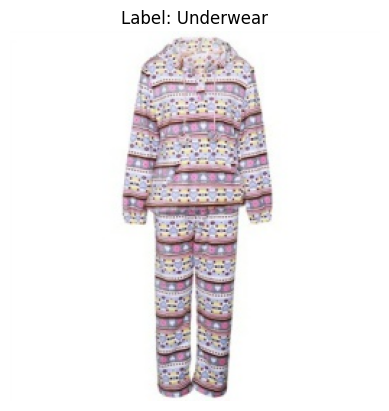

images/3/56/92341249,4011232356.jpg, Label: Suit


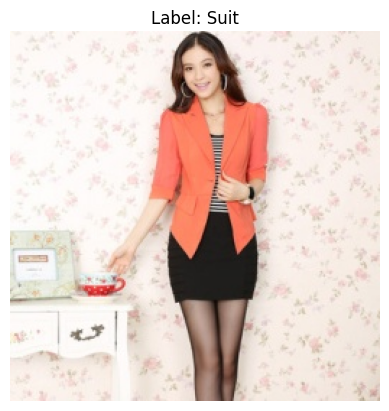

images/3/60/1256534182,3601525360.jpg, Label: Chiffon


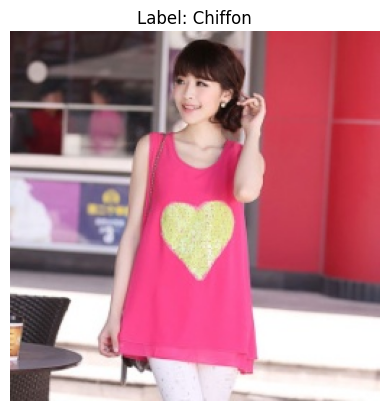

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_image_with_label(image_path: str, label: int, category_names: list, dataset_root: str):
    """
    Visualizes an image and prints its label.

    Args:
    - image_path (str): The path to the image.
    - label (int): The class id of the image.
    - category_names (list): The list of category names.
    - dataset_root (str): The root directory where the images are stored.
    """
    # Open and display the image
    image_path = dataset_root + image_path
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Label: {category_names[label]}")
    plt.axis('off')
    plt.show()

def explore_image_by_line_number(line_number: int, dataset_root: str, dataset_masks: str):
    """
    Explores an image and its label by specifying the line number in clean_label_kv.txt.

    Args:
    - line_number (int): The line number of the image in clean_label_kv.txt (1-based index).
    - dataset_root (str): The root directory where the images are stored.
    - dataset_masks (str): The directory where the text files are stored.
    """
    # Read the category names
    with open(f'{dataset_masks}/category_names_eng.txt', 'r') as f:
        category_names = f.read().splitlines()

    # Read the image paths and labels
    with open(f'{dataset_masks}/noisy_label_kv.txt', 'r') as f:
        lines = f.readlines()

    if line_number < 1 or line_number > len(lines):
        print(f"Invalid line number: {line_number}. Must be between 1 and {len(lines)}.")
        return

    line = lines[line_number - 1]  # Convert to 0-based index
    image_path, label = line.strip().split()
    label = int(label)
    print(f"{image_path}, Label: {category_names[label]}")
    visualize_image_with_label(image_path, label, category_names, dataset_root)

explore_image_by_line_number(14, dataset_root, dataset_masks)
explore_image_by_line_number(15, dataset_root, dataset_masks)
explore_image_by_line_number(18, dataset_root, dataset_masks)

# on clean dataset
# explore_image_by_line_number(2, dataset_root, dataset_masks)
# explore_image_by_line_number(10, dataset_root, dataset_masks)
# explore_image_by_line_number(13, dataset_root, dataset_masks)

##### Noisy and Clean Datasets

In [4]:
def count_lines(file_path):
    """
    Count the number of lines in a text file.

    Args:
        file_path (str): Path to the text file.

    Returns:
        int: Number of lines in the file.
    """
    with open(file_path, 'r') as file:
        line_count = sum(1 for line in file)
    return line_count

In [5]:
print("Noisy")
print(f"There are {count_lines(f'{dataset_masks}noisy_train_key_list.txt')} noisy train labels")
# noisy test labels?
print(f"There are {count_lines(f'{dataset_masks}noisy_label_kv.txt')} noisy labels")

print("\nClean")
print(f"There are {count_lines(f'{dataset_masks}clean_train_key_list.txt')} clean train labels")
print(f"There are {count_lines(f'{dataset_masks}clean_test_key_list.txt')} clean test labels")
print(f"There are {count_lines(f'{dataset_masks}clean_label_kv.txt')} clean labels")

Noisy
There are 1000000 noisy train labels
There are 1037497 noisy labels

Clean
There are 47570 clean train labels
There are 10526 clean test labels
There are 72409 clean labels


In [ ]:
import pickle
import matplotlib.pyplot as plt
from PIL import Image

# Load the dataset from the pickle file
with open(dataset_train_path, 'rb') as file:
    dataset = pickle.load(file)

# Initialize the custom dataset
custom_dataset = CustomImageDataset(img_labels=dataset, img_dir=dataset_img)

# Function to display images from the dataset
def display_images_from_dataset(dataset, num_images=2):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    
    for i in range(num_images):
        image, label = dataset[i]
        axes[i].imshow(image)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    
    plt.show()

# Display the images
display_images_from_dataset(dataset)

## Dataset Exploration

In [ ]:
from config import *
from LoadDataset import CustomImageDataset

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
from config import dataset_test_path, dataset_train_path, dataset_val_path

# Define the transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets
train_dataset = CustomImageDataset(file_path=dataset_train_path, folder_path=dataset_root, transform=transform)
val_dataset = CustomImageDataset(file_path=dataset_val_path, folder_path=dataset_root, transform=transform)
test_dataset = CustomImageDataset(file_path=dataset_test_path, folder_path=dataset_root, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [ ]:
# Example usage: Iterate through the train_loader and print batch sizes
for images, labels in train_loader:
    print(f'Batch size: {images.size(0)}')
    break  # Just to test the loader

print("Data loaders created and ready to use.")

Batch size: 128
Data loaders created and ready to use.


Visualize normalized images (for training)

In [ ]:
import matplotlib.pyplot as plt

def show_image_with_label(image, label):
    plt.imshow(image.permute(1, 2, 0))  # Convert image from (C, H, W) to (H, W, C)
    plt.title(class_names[label])
    plt.axis('off')
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


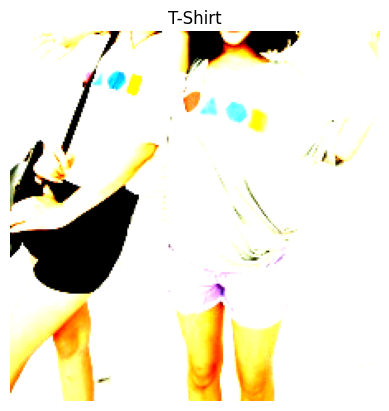

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


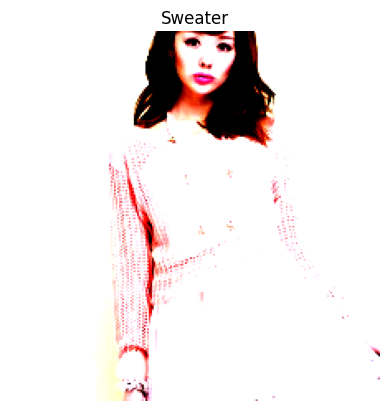

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


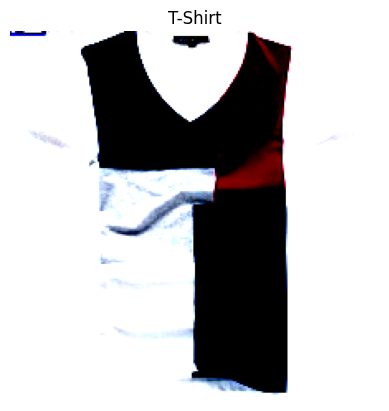

In [ ]:
# Visualize an image from each dataset
for dataset_loader in [train_loader, val_loader, test_loader]:
    images, labels = next(iter(dataset_loader))
    show_image_with_label(images[0], labels[0].item())

Visualize images without normalization (for humans)

In [ ]:
import numpy as np
# Define the normalization and its inverse
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def denormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

def show_image_with_label(image, label, file_path):
    # Undo normalization
    image = denormalize(image, mean, std)
    # Convert image from (C, H, W) to (H, W, C) and clip to [0, 1]
    image = np.clip(image.permute(1, 2, 0).numpy(), 0, 1)
    
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')
    plt.show()
    print(f'File path: {file_path}')

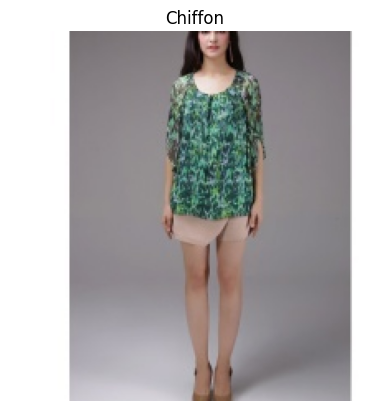

File path: images/4/70/259434989,4201509470.jpg


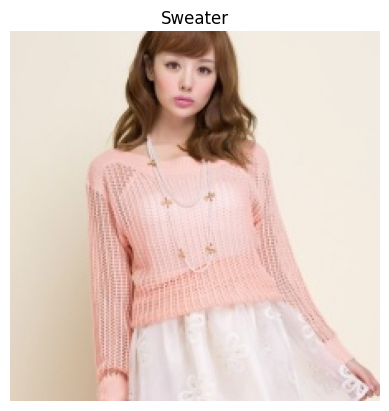

File path: images/0/32/4065769813,3014480032.jpg


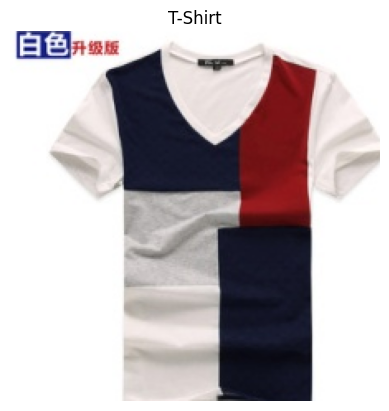

File path: images/5/38/3168452364,458871538.jpg


In [ ]:
# Visualize an image from each dataset
for dataset_loader in [train_loader, val_loader, test_loader]:
    images, labels, file_paths = next(iter(dataset_loader))
    show_image_with_label(images[0], labels[0].item(), file_paths[0])